In [16]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_Q_root_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [17]:
data

['t_n55          5.7198 ( 5.3011,  6.5128) ( 5.2313,  6.3964)  1.1651 (Jnode 106)\n',
 't_n56          5.5687 ( 5.0536,  6.3638) ( 4.9866,  6.2538)  1.2672 (Jnode 105)\n',
 't_n57          5.0927 ( 4.6121,  5.8252) ( 4.5354,  5.7114)  1.1760 (Jnode 104)\n',
 't_n58          4.2318 ( 3.8142,  4.8508) ( 3.7745,  4.7707)  0.9962 (Jnode 103)\n',
 't_n59          4.0574 ( 3.6549,  4.6535) ( 3.6109,  4.5688)  0.9579 (Jnode 102)\n',
 't_n60          3.8476 ( 3.4651,  4.4144) ( 3.4215,  4.3392)  0.9177 (Jnode 101)\n',
 't_n61          3.5293 ( 3.1738,  4.0480) ( 3.1294,  3.9816)  0.8522 (Jnode 100)\n',
 't_n62          1.6238 ( 1.3857,  1.9120) ( 1.3751,  1.8949)  0.5198 (Jnode 99)\n',
 't_n63          2.4986 ( 2.2199,  2.8817) ( 2.1896,  2.8395)  0.6499 (Jnode 98)\n',
 't_n64          1.7932 ( 1.5747,  2.0861) ( 1.5671,  2.0693)  0.5022 (Jnode 97)\n',
 't_n65          1.5630 ( 1.3663,  1.8240) ( 1.3554,  1.8045)  0.4491 (Jnode 96)\n',
 't_n66          1.2189 ( 1.0571,  1.4296) ( 1.0474,  1.41

In [18]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [19]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [20]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [21]:
posterior_mean_iqtree

[5.7198,
 5.5687,
 5.0927,
 4.2318,
 4.0574,
 3.8476,
 3.5293,
 1.6238,
 2.4986,
 1.7932,
 1.563,
 1.2189,
 0.8344,
 0.5593,
 0.2254,
 1.8839,
 3.8963,
 3.4846,
 3.5123,
 2.5173,
 2.2176,
 2.0238,
 3.8165,
 3.5923,
 3.4221,
 3.2205,
 2.9407,
 2.8274,
 2.4562,
 2.2332,
 2.0283,
 1.5372,
 1.3702,
 2.5043,
 2.0033,
 3.7156,
 0.9102,
 3.5981,
 3.3342,
 2.9518,
 2.7092,
 1.9865,
 2.2152,
 2.8454,
 2.6875,
 2.4094,
 1.9326,
 2.4088,
 4.5524,
 3.4274,
 2.1738,
 1.705,
 4.0069]

In [22]:
lower_ci_iqtree

[]

In [23]:
upper_ci_iqtree

[]

In [24]:
file_LG = open("LG_G4_codeml_root_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [26]:
posterior_mean_baseml

[5.7188,
 5.5667,
 5.0832,
 4.2186,
 4.0408,
 3.8279,
 3.5116,
 1.6426,
 2.4792,
 1.7826,
 1.5518,
 1.2065,
 0.8283,
 0.5556,
 0.2245,
 1.8719,
 3.8822,
 3.4525,
 3.4913,
 2.5127,
 2.2025,
 2.011,
 3.8099,
 3.5784,
 3.4161,
 3.2076,
 2.9284,
 2.8091,
 2.4376,
 2.209,
 2.0031,
 1.5239,
 1.3545,
 2.4978,
 1.9948,
 3.7013,
 0.9326,
 3.5827,
 3.3162,
 2.9387,
 2.6872,
 1.9759,
 2.1969,
 2.8249,
 2.6625,
 2.3731,
 1.9192,
 2.4095,
 4.5358,
 3.4153,
 2.1653,
 1.7338,
 4.0553]

In [27]:
posterior_mean_iqtree

[5.7198,
 5.5687,
 5.0927,
 4.2318,
 4.0574,
 3.8476,
 3.5293,
 1.6238,
 2.4986,
 1.7932,
 1.563,
 1.2189,
 0.8344,
 0.5593,
 0.2254,
 1.8839,
 3.8963,
 3.4846,
 3.5123,
 2.5173,
 2.2176,
 2.0238,
 3.8165,
 3.5923,
 3.4221,
 3.2205,
 2.9407,
 2.8274,
 2.4562,
 2.2332,
 2.0283,
 1.5372,
 1.3702,
 2.5043,
 2.0033,
 3.7156,
 0.9102,
 3.5981,
 3.3342,
 2.9518,
 2.7092,
 1.9865,
 2.2152,
 2.8454,
 2.6875,
 2.4094,
 1.9326,
 2.4088,
 4.5524,
 3.4274,
 2.1738,
 1.705,
 4.0069]

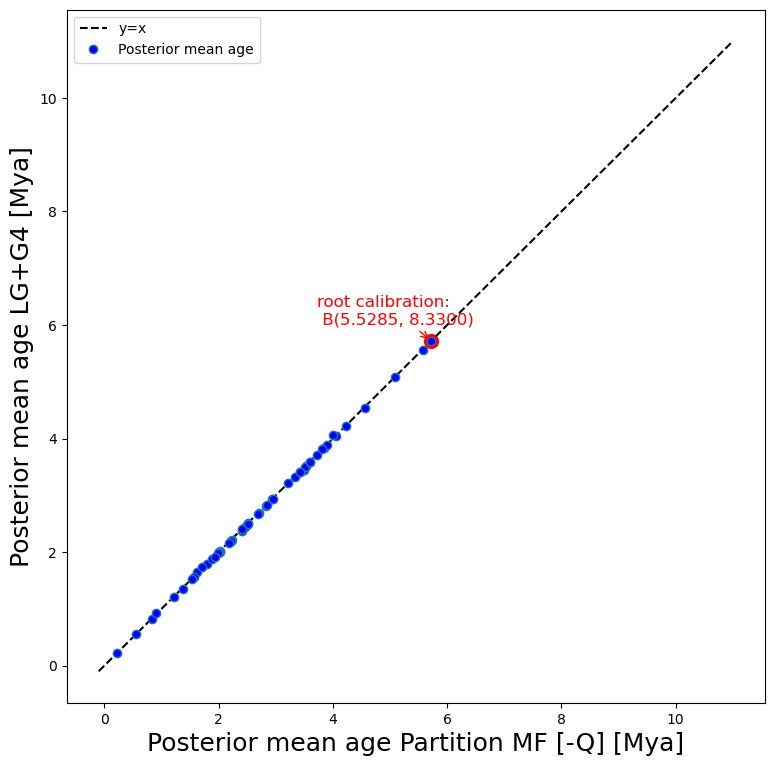

In [28]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,11], 
        [-0.1,11], 
        'k--', label='y=x')
points = ax.plot(posterior_mean_iqtree, posterior_mean_baseml, 'o', label='Posterior mean age')

points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[25], posterior_mean_baseml[25], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n B(5.5285, 8.3300)', 
        xy=(posterior_mean_iqtree[0], posterior_mean_baseml[0]), 
        xytext=(posterior_mean_iqtree[0] -2,  posterior_mean_baseml[0] + 0.3),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
 
# Labels and title
ax.set_ylabel('Posterior mean age LG+G4 [Mya]', fontsize=18)
ax.set_xlabel('Posterior mean age Partition MF [-Q] [Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and Partition MF [-Q] [t55 ~ B(5.5285, 8.3300)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_partition_MF_Q_root_scatter.png')

In [29]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')